![uwm_logo1_pl.svg](https://uwm.edu.pl/sites/default/files/2023-01/uwm_logo_poziome_PL.png)

# Symulacje komputerowe
## Laboratorium 03 - Automaty komórkowe
**mgr inż. Adam Zalewski**<br>
na podstawie materiałów **dra inż. Mariusza Bodziocha**

**Zadanie 0.** Zaimportuj niezbędne biblioteki.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import warnings
warnings.filterwarnings("ignore")

**Zadanie 1.** Napisać klasę <code>class RuleAutomaton:</code>, która posiada pola *initial_state*, *grid_size*. Napisać metodę <code>def visualize(self, grid)</code>, która zwraca wykres, gdzie *grid* odpowiada za wyświetlanie siatki, <code>def run(self, rule, animation=False, grid=False):</code>, która uruchomi symulację automatu komórkowego dla podanych parametrów, gdzie:
- rule - określa regułę automatu
- animation - określa czy program ma utworzyć animację
- grid - określa czy ma zostać narysowana siatka pomocnicza

In [21]:
class RuleAutomaton:
    def __init__(self, initial_state: np.ndarray, grid_size: tuple):
        self.initial_state = initial_state
        self.grid_size = grid_size

        self.__create_grid()
    def __create_grid(self):
        self.grid = np.zeros(self.grid_size, dtype = np.int8)
        self.grid[0, :] =  self.initial_state
    
    def visualize(self, grid):
        rows, cols = self.grid.shape

        fig, ax = plt.subplots(figsize=(5, 5))

        for i in range(rows):
            for j in range(cols):
                if self.grid[i, j] == 1:
                    ax.fill_betweenx([i, i+1], j, j+1, color="gray")
        ax.set_xlim(0, cols)
        ax.set_ylim(0, rows)
        ax.set_aspect('equal')

        ax.set_xticks(np.arange(0, cols+1, 1))
        ax.set_xticks(np.arange(0, rows+1, 1))
        if grid:
            ax.grid(which = 'both', color = 'k', linestyle = '-', linewidth = 1)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        ax.tick_params(which = 'both', bottom = False, top = False, right = False, left = False,
                       labelbottom = False, labelleft = False)
        ax.invert_yaxis()

        return fig
        
    def run(self, rule, animation=False, grid=False):
        transition = {}
        rule_bits = f'{rule:08b}'

        for i in range(8):
            transition[f"{i:03b}"] = int(rule_bits[7-i])
        files=[]
        for n in range(self.grid_size[0] - 1):
            if animation:
                fig = self.visualize(grid)
                fig.savefig(f'frame_{n}.png')
                plt.close(fig)
                files.append(f'frame_{n}.png')
            for head in range(self.grid_size[1]-2):
                key = f"{self.grid[n, head]}{self.grid[n, head+1]}{self.grid[n, head+2]}"
                self.grid[n+1, head+1] = transition[key]
            
        if animation:
            fig = self.visualize(grid)
            fig.savefig(f'frame_{n+1}.png')
            plt.close(fig)
            files.append(f'frame_{n+1}.png')

            frames = [Image.open(p).convert('RGBA') for p in files]
            frames[0].save(f'{rule}.gif', save_all = True, append_images = frames[1:], duration = 200, loop = 0, optimize = True)

            for path in files:
                os.remove(path)
        else:
            plt.imshow(self.grid, cmap = 'gray_r')
            
        plt.imshow(self.grid, cmap= "gray_r")

**Zadanie 2.** Wykorzystując klasę z zadania 1 stworzyć animacje dla reguł przedstawionych na wykładzie.

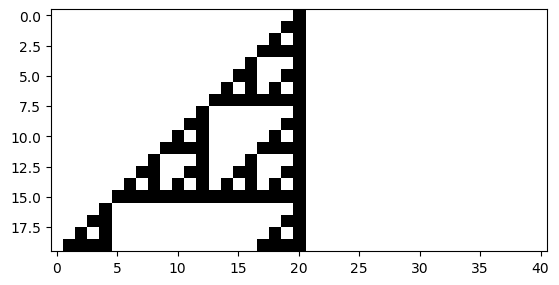

In [22]:
gs = (20, 41)
ini = np.zeros(gs[1])
ini[gs[1]//2] = 1 
ra = RuleAutomaton(ini, gs)
ra.run(102, True, True)

**Zadanie 3.** Zaimplementować automat *Gra w życie*. Automat powinien działać dla różnych warunków brzegowych oraz rodzajów sąsiedztwa.